 # Convolutional Neural Network


### What is a Convolutional Neural Network (CNN)?

A **Convolutional Neural Network (CNN or ConvNet)** is a specialized type of deep learning model designed primarily for processing and analyzing visual data, like images and videos. However, their application has expanded to other types of grid-like data, such as audio spectrograms and time-series data.

Think of it as a neural network that has a built-in "understanding" of how pixels are spatially related to each other.

---

### The Purpose and Philosophy Behind CNNs

To understand the *why*, let's first consider the problem with using a standard Dense Neural Network (also called a Multi-Layer Perceptron or MLP) for an image.

**The Problem with Dense Networks for Images:**

1.  **Massive Number of Parameters:** A simple 100x100 pixel color image has 100 x 100 x 3 = 30,000 input values. If the first hidden layer has just 1,000 neurons, you would have 30,000 x 1,000 = **30 million** weights (parameters) to train just for the first layer! This is computationally expensive and prone to overfitting.
2.  **Loss of Spatial Information:** A Dense network requires the input to be a flat vector. To do this, you'd "unroll" the 100x100 image into a single long line of 30,000 pixels. This completely destroys the 2D spatial structure. The network no longer knows that pixel (10,10) is next to pixel (10,11). It treats all pixels as independent, which is fundamentally wrong for images.

**The Philosophy and Purpose of CNNs:**

CNNs were designed to solve these two problems by incorporating two key assumptions about images:

1.  **Local Connectivity:** A neuron in a CNN is only connected to a small local region of the input image, not all pixels. This makes sense because a single pixel doesn't tell you much; you need its neighboring pixels to identify an edge, a corner, or a texture. This local region is called the **receptive field**.
2.  **Parameter Sharing:** The same "detector" (or filter) that learns to find a vertical edge in the top-left corner of an image can and should be used to find a vertical edge anywhere else in the image. CNNs enforce this by using the **same set of weights (the filter) across the entire image**.

These two principles lead to the core philosophy: **Hierarchical Feature Learning.**

*   **Early layers** learn simple features like edges, corners, and color gradients.
*   **Middle layers** combine these simple features to learn more complex patterns like eyes, noses, or textures (fur, wood grain).
*   **Deeper layers** combine those patterns to recognize even more complex objects like faces, cars, or animals.

This mimics, to some extent, how the human visual cortex works, building up a complete picture from simple components.

---

### How a CNN Works: The Key Components

A typical CNN architecture is a sequence of layers that work together to extract features and then classify the image.

1.  **Convolutional Layer (The Core):**
    *   This is where the magic happens. A small matrix of weights, called a **filter** or **kernel** (e.g., 3x3 or 5x5), slides or "convolves" across the entire input image.
    *   At each position, the filter performs an element-wise multiplication with the pixels it's on top of and sums up the results into a single number.
    *   This process creates a **feature map** (or activation map), which is a smaller grid that shows where in the image the specific feature (e.g., a vertical edge) was detected.
    *   A single convolutional layer can have multiple filters, each learning to detect a different feature.

2.  **Activation Function (e.g., ReLU):**
    *   After convolution, an activation function like ReLU (Rectified Linear Unit) is applied to the feature map. It's a simple function that introduces non-linearity (`f(x) = max(0, x)`), allowing the network to learn more complex patterns than just linear ones.

3.  **Pooling Layer (Sub-sampling):**
    *   The purpose of this layer is to reduce the spatial dimensions (width and height) of the feature maps.
    *   This makes the network faster and more robust to small translations of the features in the image (e.g., if a cat's ear is slightly to the left or right, the network should still recognize it).
    *   The most common type is **Max Pooling**, which slides a window over the feature map and takes the maximum value from each window.

4.  **Flatten Layer:**
    *   After several rounds of `Convolution -> ReLU -> Pooling`, you have a set of high-level feature maps. The Flatten layer unrolls these 2D maps into a single 1D vector, preparing the data for the final stage.

5.  **Fully Connected (Dense) Layer:**
    *   The flattened vector is fed into a standard Dense Neural Network. These layers take the high-level features extracted by the convolutional layers and use them to perform the final classification (e.g., "cat" vs. "dog").



---

### CNN vs. Dense Neural Network: The Key Differences

Here is a summary table to highlight the core differences:

| Feature | Convolutional Neural Network (CNN) | Dense Neural Network (DNN) |
| :--- | :--- | :--- |
| **Input Data Handling** | Excels at grid-like data (2D images, 1D sequences). Preserves spatial structure. | Requires a flat 1D vector. Loses all spatial information. |
| **Connectivity** | **Local Connectivity.** Neurons connect to a small local region (receptive field). | **Full Connectivity.** Each neuron in a layer is connected to every neuron in the previous layer. |
| **Parameter Sharing** | **Yes.** The same filter (weights) is used across the entire input, drastically reducing the number of parameters. | **No.** Every connection has its own unique weight. Leads to a huge number of parameters. |
| **Spatial Awareness** | **High.** Explicitly designed to recognize patterns based on their spatial relationships. | **Low/None.** Treats input features as independent of their position relative to each other. |
| **Architecture** | A stack of `Convolutional`, `Pooling`, and `Dense` layers. | A stack of only `Dense` layers. |
| **Best Use Cases** | Image classification, object detection, facial recognition, medical image analysis, video analysis. | Tabular data (e.g., from CSV files), general classification/regression tasks where spatial structure is not important. |

### Simple Analogy

Imagine you're trying to find all the instances of the letter "T" in a large book.

*   **A Dense Network approach** would be to read every single letter in the book, remember its exact position (page, line, character number), and then try to find a pattern. This is incredibly inefficient.
*   **A CNN approach** is to create a small "T-detector" stencil (the **filter**). You then slide this stencil over every page of the book (**convolution**). Whenever the letters underneath the stencil match the "T" shape, you make a mark on a separate sheet of paper (**feature map**). You don't need to re-learn what a "T" looks like for every page; you use the same detector (**parameter sharing**). This is far more efficient and effective.




*   In a **Dense Neural Network (DNN)**, we flatten the **original input data** at the very beginning.
*   In a **Convolutional Neural Network (CNN)**, we flatten the **extracted feature maps** at the very end, just before the final classification.



---

### 1. Flattening in a Dense Neural Network (DNN)

A DNN requires a 1D vector as input. If you have an image, you must "unroll" or "flatten" it into a long list of pixels *before* feeding it to the first layer.

**The Flow:**
`Original Image (2D) -> FLATTEN -> Dense Layer 1 -> Dense Layer 2 -> ... -> Output`

**The Consequence:** This is a **destructive** step. You lose all spatial information *before* the network has a chance to learn anything from it. The network never "sees" the image as a grid; it only sees a long, unorganized list of numbers.

**Analogy:** It's like trying to understand a sentence by being given a bag containing all its letters, but completely jumbled. You have all the pieces, but you've lost the order and structure that gives them meaning.

---

### 2. Flattening in a Convolutional Neural Network (CNN)

In a CNN, the vast majority of the work is done by the convolutional and pooling layers. These layers are specifically designed to process the data **while preserving its spatial structure** to learn hierarchical features.

The `Flatten` layer is used only at the end of this feature extraction process. Its job is to act as a **bridge** between the spatial feature-extraction part of the network and the classification part.

**The Flow:**
`Original Image (2D) -> Conv/Pool Layers -> Extracted Feature Maps (2D) -> FLATTEN -> Dense Layer(s) -> Output`

**Why is this not destructive?**

By the time the data reaches the `Flatten` layer in a CNN, it is no longer the original image. It is a set of high-level **feature maps**. Each feature map is an abstract representation that says, "Here is where I found a specific pattern (e.g., an eye, a wheel, a texture)."

The `Flatten` layer simply takes these powerful, spatially-learned features and arranges them into a 1D vector so that a standard `Dense` layer can perform the final classification. The Dense layer then learns combinations of these high-level features to make a decision (e.g., "If I see features for 'eye', 'whisker', and 'furry texture' together, I will classify this as a 'cat'").

**Analogy:** Think of the CNN process like this:
1.  A team of expert art critics (the **Convolutional Layers**) examines a painting. They write down their findings on separate notepads (the **Feature Maps**). One notepad says "I see sharp, vertical lines," another says "I see patches of orange fur," and a third says "I see a round, dark shape."
2.  An assistant (the **Flatten Layer**) takes all these expert notes and types them up into a single, organized list (the **1D Vector**).
3.  The head curator (the **Dense Layer**) reads that single list and makes the final decision: "Based on these notes—vertical lines, orange fur, round shape—this is a picture of a tiger."

The crucial point is that the spatial analysis was **already done** by the critics before the notes were compiled into a single list. The flattening didn't destroy the meaning; it just packaged the extracted meaning for the final decision-maker.

---


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Load the MINST data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print()

print(X_train.shape)
print(X_test.shape)

print()

print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)

(60000,)
(10000,)


# Pre-Processing Data

A CNN expects the input data in a specific format . We need to make two main changes

1. Reshape the data : CNNs in Keras expect a 4D input shape : (num_sample, height, width, channels) . Since MNIST images are grayscale, they have only 1 color channel. We need to add this dimension.

2. Normalize the data: Pixel values range from 0 (black) to 255 (white). Neural networks work best with small input values, so we'll scale these values to be between 0 and 1 by dividing by 255.0.

3. One-Hot Encode Labels: The labels (y_train, y_test) are currently integers from 0 to 9. For classification, it's better to convert them into a "one-hot" vector format. For example, the digit 5 becomes the vector [0, 0, 0, 0, 0, 1, 0, 0, 0, 0].

In [23]:
#Reshape the input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

#Normalization
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#One-hot encode the labels

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [24]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        # First Convolutional Block
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Second Convolutional Block
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten the feature maps to a 1D vector
        layers.Flatten(),

        # Dense (Fully Connected) Layer for classification
        layers.Dense(128, activation="relu"),

        # Output Layer with 10 neurons (one for each class)
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Print a summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
batch_size = 128
epochs = 15

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1 # Use 10% of training data for validation
)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.8527 - loss: 0.4983 - val_accuracy: 0.9783 - val_loss: 0.0754
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.9795 - loss: 0.0667 - val_accuracy: 0.9853 - val_loss: 0.0510
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9868 - loss: 0.0426 - val_accuracy: 0.9885 - val_loss: 0.0398
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9898 - loss: 0.0333 - val_accuracy: 0.9883 - val_loss: 0.0395
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 106ms/step - accuracy: 0.9925 - loss: 0.0242 - val_accuracy: 0.9883 - val_loss: 0.0406
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9903 - val_loss: 0.0366
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9955 - loss: 0.0153 - val_accuracy: 0.9890 - val_loss: 0.0410
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.9955 - loss: 0

In [27]:
score = model.evaluate(X_test, y_test, verbose=1)

print('Test losss : ', score[0])
print("Test accuracy : ", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9862 - loss: 0.0572
Test losss :  0.04412248358130455
Test accuracy :  0.9886999726295471


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


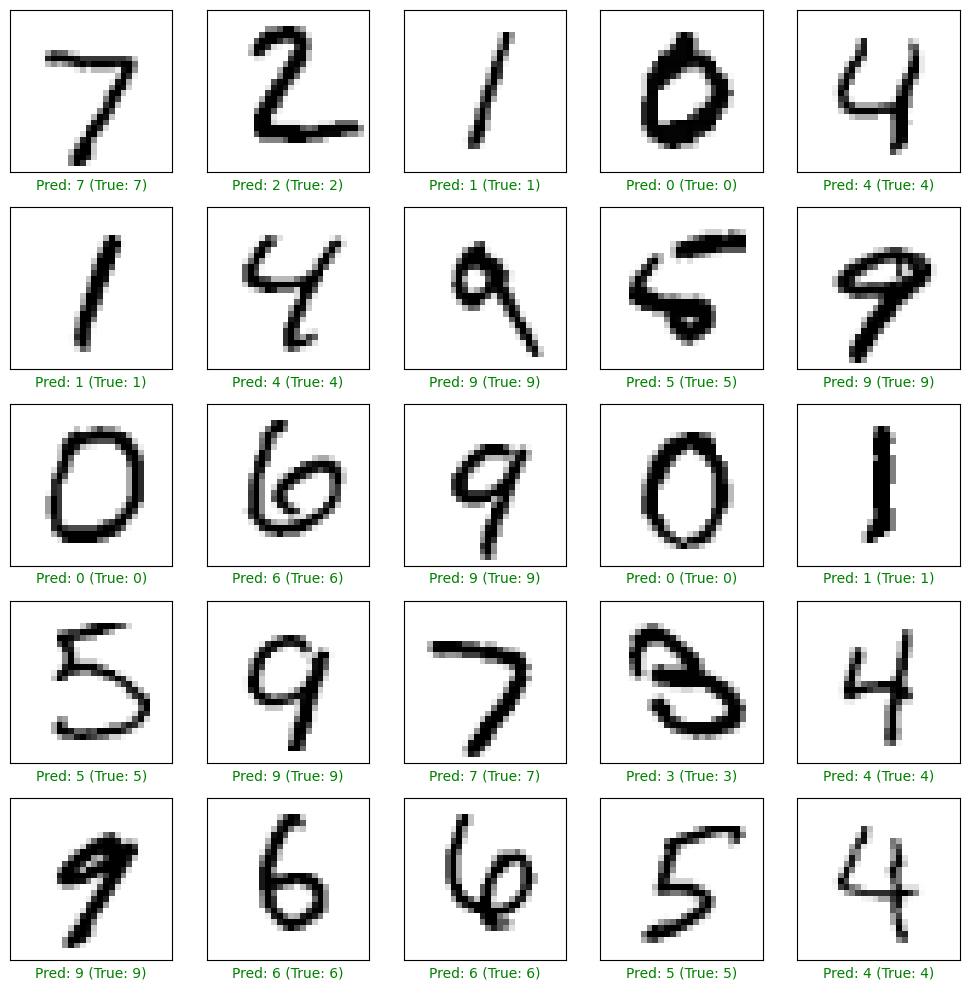

In [29]:
# Make predictions on the test set
predictions = model.predict(X_test)

# The output 'predictions' is an array of 10 probability scores for each image.
# We can find the predicted digit by finding the index with the highest probability.
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Let's visualize a few predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # We need to reshape the image back to 28x28 to display it
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = predicted_labels[i]
    true_label = true_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_label} (True: {true_label})", color=color)

plt.tight_layout()
plt.show()